In [1]:
import json
import pandas as pd
import numpy as np
import re

# Extract

In [2]:
file_dir='/Users/xutian/Desktop/DATA BOOT CAMP/Module 8/Movies-ETL'

with open (f'{file_dir}/wikipedia-movies.json',mode='r') as file:
    wiki_movies_raw=json.load(file) # to load raw JSON into a list of dictionary
    
len(wiki_movies_raw)

7311

In [3]:
# First 5 record
#wiki_movies_raw[:5]

In [4]:
# Last 5 records
#wiki_movies_raw[-5:]

In [5]:
# Some records in the middle
#wiki_movies_raw[3600:3605]

In [6]:
#wiki_movies_raw[0]

In [7]:
kaggle_metadata=pd.read_csv(f'{file_dir}/movies_metadata.csv',low_memory=False)
ratings=pd.read_csv('ratings.csv')

In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [9]:
kaggle_metadata.sample(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
32707,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,330421,tt4429128,ta,Papanasam,A cinephile tries to protect his family by hid...,...,2015-07-03,14000000.0,181.0,"[{'iso_639_1': 'ta', 'name': 'தமிழ்'}]",Released,NaN,Papanasam,False,7.4,13.0
16101,False,NaN,2500000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,38325,tt1588875,ru,Как я провёл этим летом,Two men at a remote Arctic base begin mistrust...,...,2010-02-17,0.0,124.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,How I Ended This Summer,False,6.1,37.0
15488,False,NaN,6000000,"[{'id': 18, 'name': 'Drama'}]",NaN,32395,tt1226232,en,The Greatest,"Teenagers Rose and Bennett were in love, and t...",...,2009-01-17,0.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Greatest,False,6.2,36.0
7331,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,21594,tt0045564,en,The Blue Gardenia,Norah Larkin is a single woman whose heart is ...,...,1953-03-23,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There was nothing lily-white about her -- the ...,The Blue Gardenia,False,6.2,15.0
34986,False,NaN,0,"[{'id': 37, 'name': 'Western'}]",NaN,130322,tt0062659,it,Ammazzali tutti e torna solo,"During the American Civil War, a Confederate p...",...,1968-12-31,0.0,100.0,[],Released,NaN,Kill Them All and Come Back Alone,False,6.5,1.0


# Tranformation/Clean data set

In [10]:
wiki_movies_df=pd.DataFrame(wiki_movies_raw)

In [11]:
#wiki_movies_df.head()

In [12]:
#wiki_movies_df.columns.tolist()

## Structure of list comprehension:
### [expression for element in source_list if some_expression]

In [13]:
wiki_movies=[movie for movie in wiki_movies_raw if ('Director' in movie 
                                                     or 'Directed by' in movie 
                                                     and 'imdb_link' in movie
                                                   and 'No. of episodes' not in movie)]
len(wiki_movies)

7076

In [14]:
wiki_movies_df=pd.DataFrame(wiki_movies)
#wiki_movies_df.head()

In [15]:
#sorted(wiki_movies_df.columns.tolist())

In [16]:
wiki_movies_df[wiki_movies_df['Polish'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
7070,https://en.wikipedia.org/wiki/Cold_War_(2018_f...,2018,https://www.imdb.com/title/tt6543652/,Cold War,Paweł Pawlikowski,"[Tanya Seghatchian, Ewa Puszczyńska]",NaN,NaN,NaN,"[Joanna Kulig, Tomasz Kot, Borys Szyc, Agata K...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimna wojna


## 1. Delete the columns that with an alternative name, and create a new "alternative name" column in dataframe

## 2. Merge column names with same information

In [17]:
def clean_movie(movie):
    movie=dict(movie) # create a non-destructive copy
    alt_titles={}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key]=movie[key]
            movie.pop(key)
    if len(alt_titles)>0:
        movie['alt_titles']=alt_titles
        
    # merge column names
    def change_column_name(old_name,new_name):
        if old_name in movie:
            movie[new_name]=movie.pop(old_name)
            
    # call the inner function
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    
    return movie
# return a single dictionary

In [18]:
# create a new list of dictionary
clean_movies=[clean_movie(movie) for movie in wiki_movies] # Every item in wiki_movies list is a dictionary
wiki_movies_df=pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

## Remove Duplicate Rows

In [19]:
wiki_movies_df['imdb_id']=wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id',inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


## Remove columns with more than 90% null values

In [20]:
di={}
for column in wiki_movies_df.columns:
    column_null=wiki_movies_df[column].isnull().sum()
    if column_null<len(wiki_movies_df)*0.9:
        di[column]=column_null

columns_to_keep=[]
for key in di.keys():
    columns_to_keep.append(key)
wiki_movies_df=wiki_movies_df[columns_to_keep]
wiki_movies_df.head()


# Use list comprehesion:

# wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]


,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018


## Covert and Parse the Data
### covert data types for each column
#### regular expressions

In [21]:
wiki_movies_df.dtypes

# Box office should be numeric.
# Budget should be numeric.
# Release date should be a date object.
# Running time should be numeric.

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [22]:
wiki_movies_df.count()

url                      7033
year                     7033
imdb_link                7033
title                    7032
Based on                 2181
Starring                 6849
Cinematography           6342
Release date             7001
Running time             6894
Country                  6797
Language                 6789
Budget                   4738
Box office               5485
Director                 7033
Distributor              6676
Editor(s)                6485
Composer(s)              6515
Producer(s)              6831
Production company(s)    5355
Writer(s)                6834
imdb_id                  7033
dtype: int64

In [23]:
# Box office column:
box_office=wiki_movies_df['Box office'].dropna()
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [24]:
box_office[box_office.map(lambda x:type(x)!=str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [36]:
box_office=box_office.apply(lambda x: ' '.join(x) if type(x)==list else x)

In [50]:
form_one=r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_two=r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [51]:
box_office[~matches_form_one & ~matches_form_two] # ~ means not

600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3631                            TBA
3879       CN¥3.650 million (China)
4116                     £7,385,434
4306                            $30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [52]:
def parse_dollars(s):
    if type(s)!=str:
        return np.nan
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
        s=re.sub('\$|\s|[a-zA-Z]','', s)
        value=float(s)*10**6
        return value
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
        s=re.sub('\$|\s|[a-zA-Z]','', s)
        value=float(s)*10**9
        return value
    elif  re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):
        s=re.sub('\$|,','', s)
        value=float(s)
        return value
    else:
        return np.nan
        

In [53]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [54]:
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [55]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [56]:
# Parse Budget data
budget=wiki_movies_df['Budget'].dropna()
budget=budget.apply(lambda x: ' '.join(x) if type(x)==list else x)
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)
wiki_movies_df['Budget']

0       $20 million
1        $6 million
2       $35 million
3       $12 million
4       $25 million
           ...     
7071    $42 million
7072    $60 million
7073    $20 million
7074     $9 million
7075            NaN
Name: Budget, Length: 7033, dtype: object

In [68]:
form_one=r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_two=r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget = budget.str.replace(r'\[\d+\]\s*', '',regex=True)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5424                            N/A
5447                     £4 million
5671                    €14 million
5687                   $ dead link]
6385                  £ 12 million 
6593                     £3 

In [69]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [71]:
# Parse Release Date
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)
wiki_movies_df['release_date']

0      1990-07-11
1      1990-05-17
2      1990-08-10
3      1990-12-25
4      1990-12-19
          ...    
7071   2018-12-25
7072   2018-12-11
7073   2018-01-01
7074   2018-08-31
7075   2018-12-01
Name: release_date, Length: 7033, dtype: datetime64[ns]

In [78]:
# Parse Running Time
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6877

In [76]:
running_time[running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE) != True]

1347    25 : 03
1551     varies
3925    4 hours
Name: Running time, dtype: object

In [82]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)
wiki_movies_df.drop('Running time', axis=1, inplace=True)
wiki_movies_df['running_time']

0       102.0
1       114.0
2       113.0
3       106.0
4        95.0
        ...  
7071     90.0
7072    132.0
7073    120.0
7074    123.0
7075     90.0
Name: running_time, Length: 7033, dtype: float64

# Clean the Kaggle Data

In [83]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [86]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [87]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
kaggle_metadata=kaggle_metadata[kaggle_metadata['adult']=='False'].drop('adult',axis='columns')

In [90]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

## convert data types

In [91]:
# covert data type in video column to boolean
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [94]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [95]:
ratings.info(null_counts=True)

<ipython-input-95-ed915c4d3989>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  ratings.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [97]:
ratings['timestamp']=pd.to_datetime(ratings['timestamp'],unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

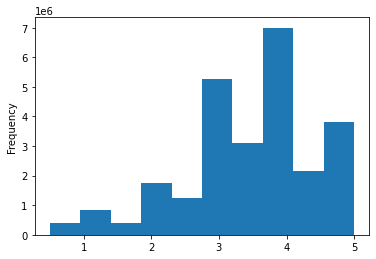

In [98]:
pd.options.display.float_format='{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()